In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [44]:

df = pd.read_csv('E:\\Main\\IPBA Jigsaw Docs\\BYOP\\Core Dataset\\Walmart Dataset\\train.csv') #df stands for Complete train data
df10 = pd.read_csv('E:\\Main\\IPBA Jigsaw Docs\\BYOP\\Core Dataset\\Walmart Dataset\\train_10.csv') #df10 stands for Year 2010
df11 = pd.read_csv('E:\\Main\\IPBA Jigsaw Docs\\BYOP\\Core Dataset\\Walmart Dataset\\train_11.csv') #df11 stands for Year 2011
df12 = pd.read_csv('E:\\Main\\IPBA Jigsaw Docs\\BYOP\\Core Dataset\\Walmart Dataset\\train_12.csv') #df12 stands for Year 2012

In [3]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
sns.set()

<function matplotlib.pyplot.show(close=None, block=None)>

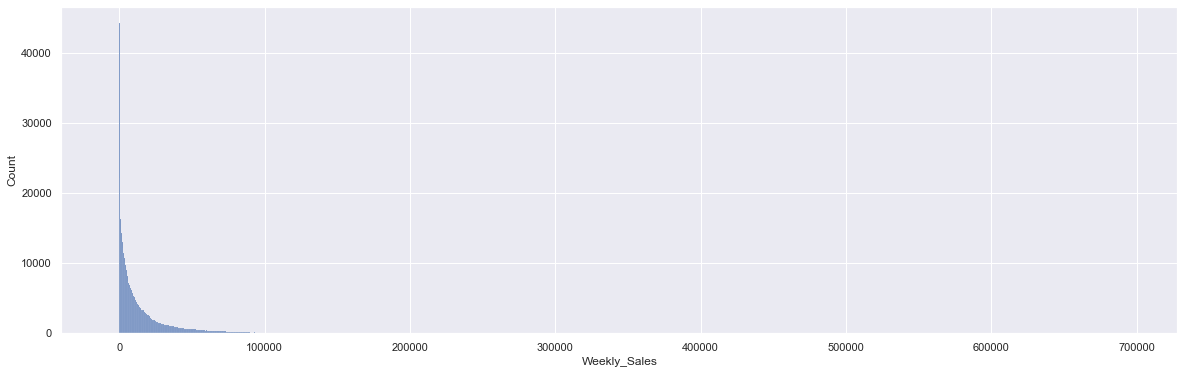

In [32]:
plt.figure(figsize=(20,6))
sns.histplot(df['Weekly_Sales'])
plt.show

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

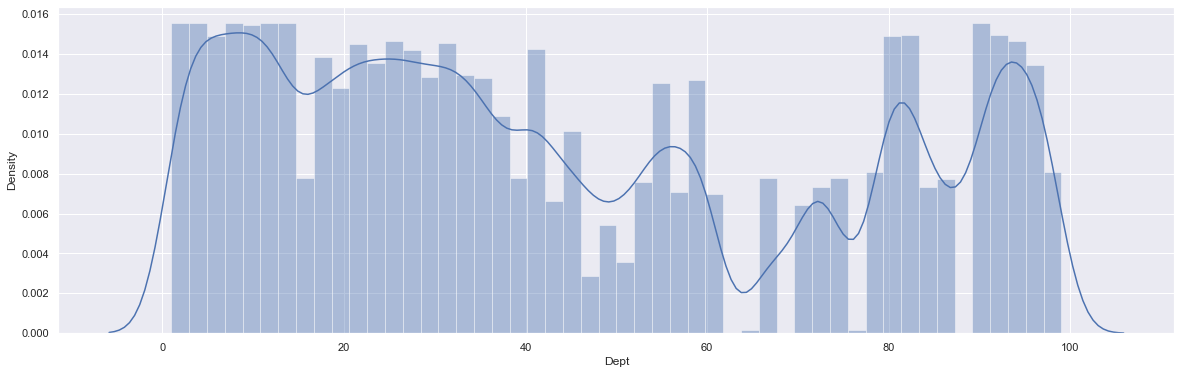

In [30]:
plt.figure(figsize=(20,6))
sns.distplot(df['Dept'])
plt.show

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

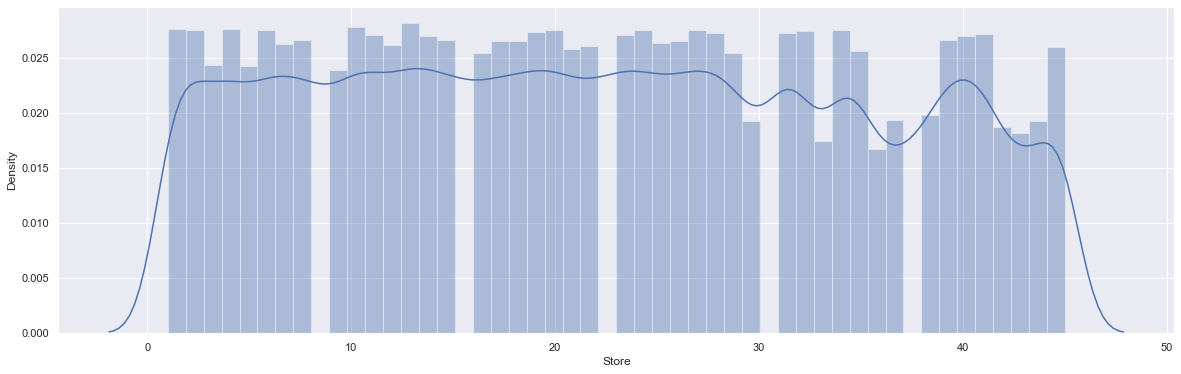

In [28]:
plt.figure(figsize=(20,6))
sns.distplot(df['Store'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

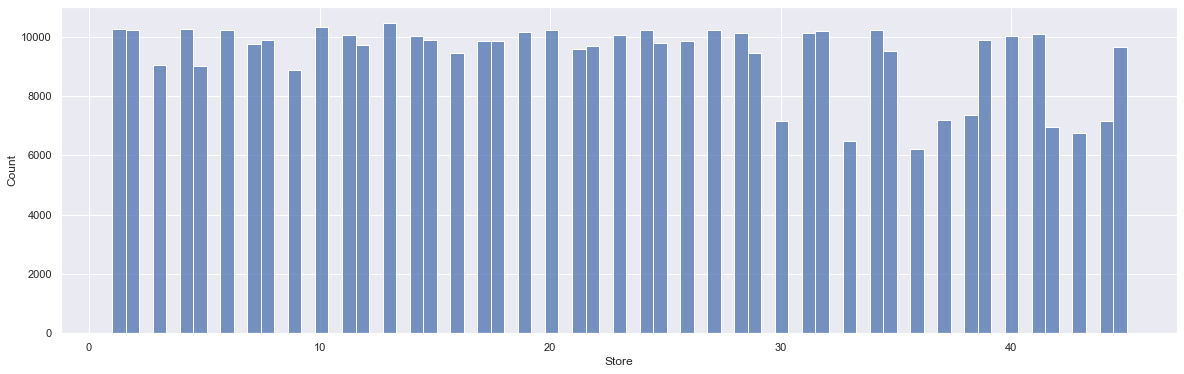

In [27]:
plt.figure(figsize=(20,6))
sns.histplot(df['Store'])
plt.show

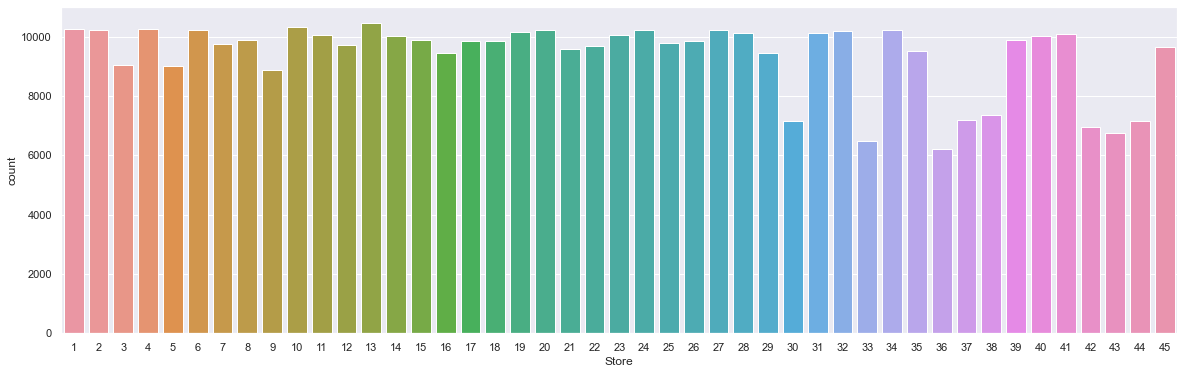

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x='Store', data=df)
plt.show()

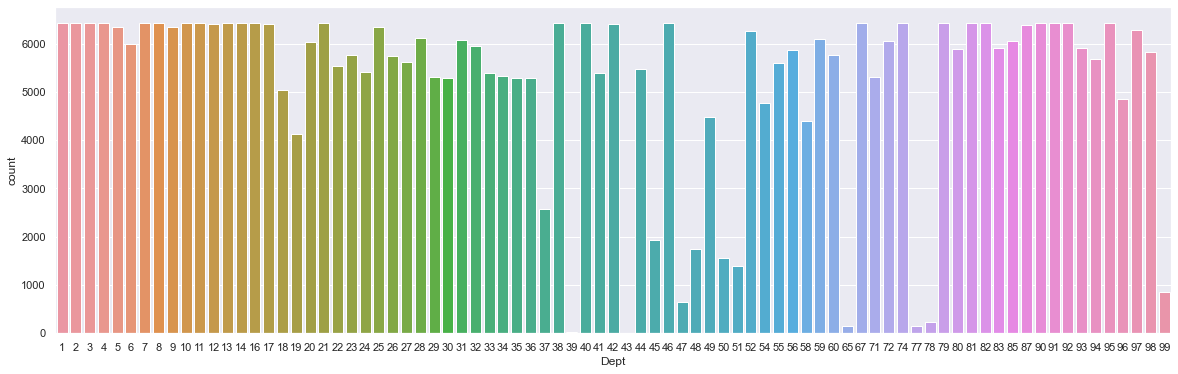

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x='Dept', data=df)
plt.show()

## Correlation

In [34]:
df.corr().style.background_gradient(cmap="coolwarm")

,Store,Dept,Weekly_Sales,IsHoliday
Store,1.000000,0.024004,-0.085195,-0.000548
Dept,0.024004,1.000000,0.148032,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774
IsHoliday,-0.000548,0.000916,0.012774,1.000000


## FY-2012

<AxesSubplot:ylabel='Frequency'>

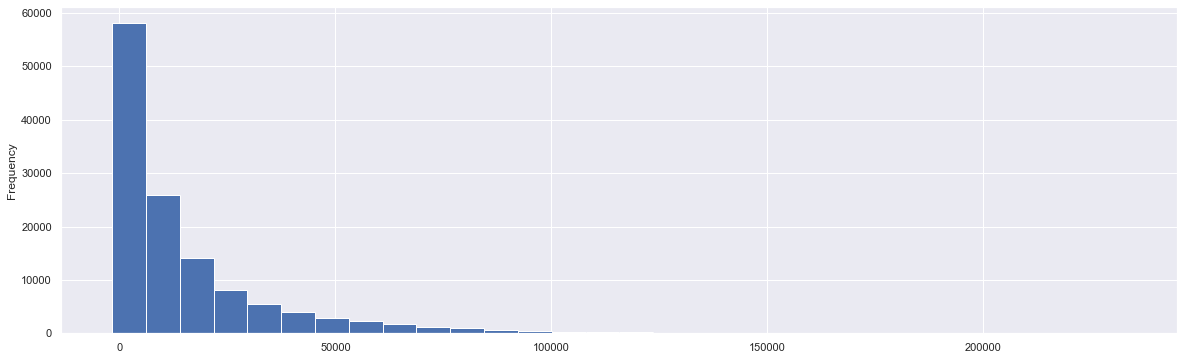

In [47]:
plt.figure(figsize=(20,6))
df12['Weekly_Sales'].plot(kind='hist',bins=30)

## FY-2010

<AxesSubplot:ylabel='Frequency'>

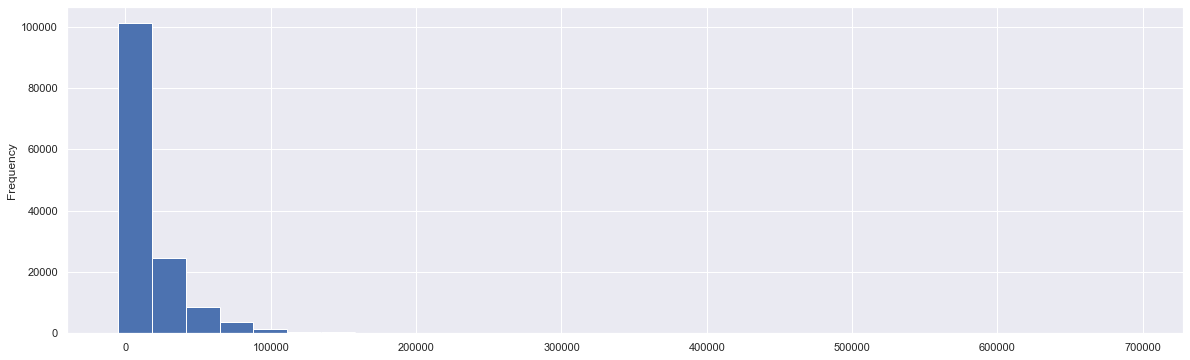

In [48]:
plt.figure(figsize=(20,6))
df10['Weekly_Sales'].plot(kind='hist',bins=30)

## FY-2011

<AxesSubplot:ylabel='Frequency'>

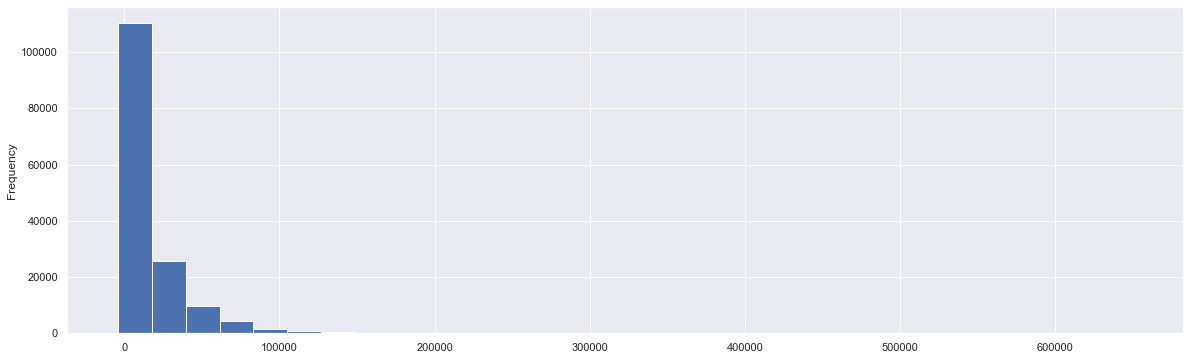

In [49]:
plt.figure(figsize=(20,6))
df11['Weekly_Sales'].plot(kind='hist',bins=30)

Text(0.5, 0, 'Date')

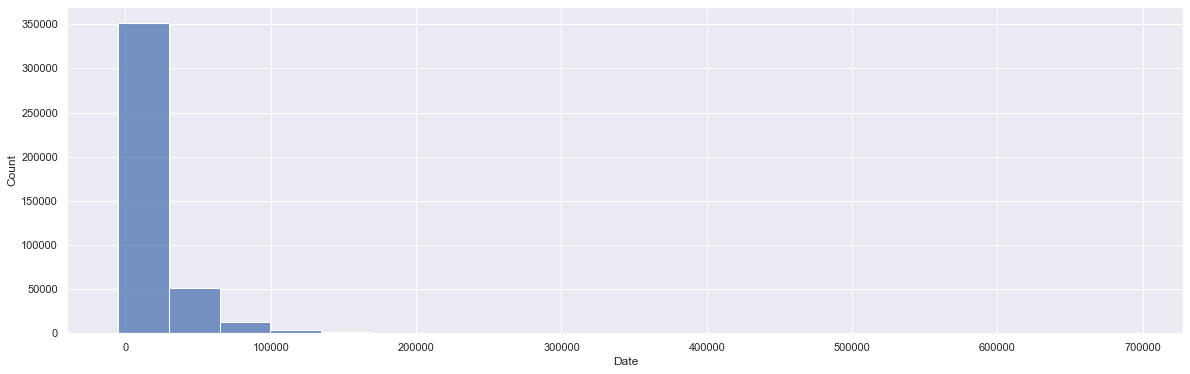

In [52]:
plt.figure(figsize=(20,6))
sns.histplot(df['Weekly_Sales'],kde=False,bins=20)
plt.xlabel('Date')

In [53]:
df10[["day", "month", "year"]] = df10["Date"].str.split("-", expand = True)
print("\nNew DataFrame:")
print(df10)


New DataFrame:
        Store  Dept        Date  Weekly_Sales  IsHoliday day month  year
0           1     1  05-02-2010      24924.50      False  05    02  2010
1           1     2  05-02-2010      50605.27      False  05    02  2010
2           1     3  05-02-2010      13740.12      False  05    02  2010
3           1     4  05-02-2010      39954.04      False  05    02  2010
4           1     5  05-02-2010      32229.38      False  05    02  2010
...       ...   ...         ...           ...        ...  ..   ...   ...
140674     45    93  31-12-2010       2072.46       True  31    12  2010
140675     45    94  31-12-2010       3966.80       True  31    12  2010
140676     45    95  31-12-2010      43149.88       True  31    12  2010
140677     45    97  31-12-2010       5881.22       True  31    12  2010
140678     45    98  31-12-2010         74.55       True  31    12  2010

[140679 rows x 8 columns]


In [59]:
df10.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,day,month,year
140674,45,93,31-12-2010,2072.46,True,31,12,2010
140675,45,94,31-12-2010,3966.80,True,31,12,2010
140676,45,95,31-12-2010,43149.88,True,31,12,2010
140677,45,97,31-12-2010,5881.22,True,31,12,2010
140678,45,98,31-12-2010,74.55,True,31,12,2010


In [60]:
df10 = df10.drop('Date', axis=1)

In [61]:
df10.head()

,Store,Dept,Weekly_Sales,IsHoliday,day,month,year
0,1,1,24924.50,False,05,02,2010
1,1,2,50605.27,False,05,02,2010
2,1,3,13740.12,False,05,02,2010
3,1,4,39954.04,False,05,02,2010
4,1,5,32229.38,False,05,02,2010


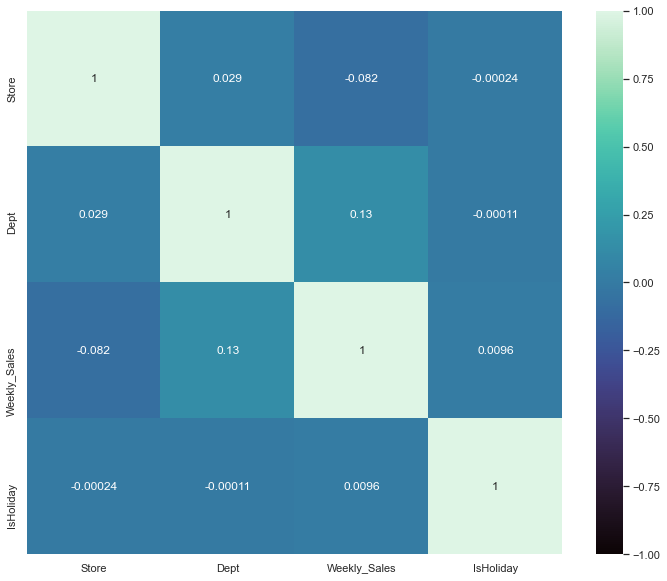

In [70]:
corr = df10.corr() #corrplot on 2010 train data

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

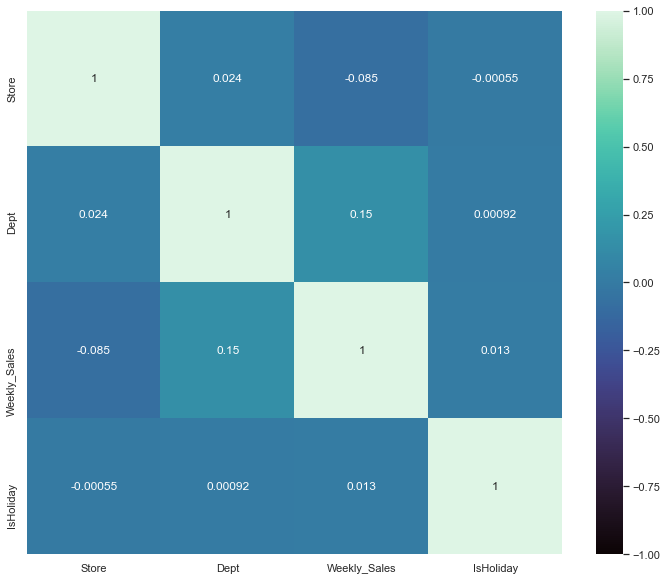

In [71]:
corr = df.corr() #corrplot on whole train data

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()